# Algoritmul HillClimbing in Python
Pentru o singura variabila int sau bit

In [7]:
import numpy as np
from math import sin, cos
import matplotlib.pyplot as grafic

In [17]:
def f_obiectiv(x):
    """
    functia obiectiv pt. hillclimbing
    :param x: punctul in care se calculeaza valoarea functiei
    :return y: valoarea functiei in punctul x
    """

    y = x**3 * sin(x/3) + x**3 * cos(2*x) -x*sin(3*x) + x*cos(x)

    return y

In [16]:
def calculare_vecini(x, nr_vecini_in_fiecare_parte, distanta_intre_vecini, capat_interval1, capat_interval2):
    """
    calculeaza vecinii unui punct (pe o axa)
    :param x: punctul curent
    :param distanta_intre_vecini:
    :param nr_vecini_in_fiecare_parte:
    :param capat_interval1:
    :param capat_interval2:
    :return vecini, valori: doua liste: puncte si valori
    """

    vecini = [x + i * distanta_intre_vecini  for i in range(-nr_vecini_in_fiecare_parte, nr_vecini_in_fiecare_parte + 1)
              if ((x + i * distanta_intre_vecini >= capat_interval1)
                  and (x + i * distanta_intre_vecini <= capat_interval2))]
    valori = [f_obiectiv(x) for x in vecini]

    return vecini, valori

In [24]:
def deseneaza_grafic(capat_interval1, capat_interval2, coordonata_x, coordonata_y, x_maxim, y_maxim):
    """
    vizualizare rezultate hillclimbing
    :param capat_interval1:
    :param capat_interval2:
    :param coordonata_x:
    :param coordonata_y:
    :param x_maxim:
    :param y_maxim:
    :return:
    """

    x_points = np.arange(capat_interval1, capat_interval2, 0.01)
    grafic.plot(x_points, [f_obiectiv(i) for i in x_points], 'k-', coordonata_x, coordonata_y, 'bo')
    grafic.plot(x_maxim, y_maxim, 'r*', markersize = 20)
    grafic.show()

Valorea maxima calculata:  851234.9164824685
Este atinsa in punctul:  94.33543561537367


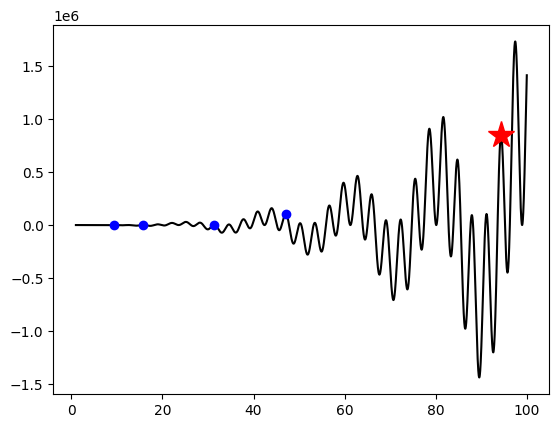

In [39]:
def hillclimbing(capat_interval1, capat_interval2, nr_puncte_initiale, nr_vecini_pe_fiecare_directie, distanta_dintre_vecini):
    """
    implementare hillclimbing pentru gasirea maximului unei functii de o variabila
    :param capat_interval1:
    :param capat_interval2:
    :param nr_puncte_initiale:
    :param nr_vecini_pe_fiecare_directie:
    :param distanta_dintre_vecini:
    :return x: punctul de maxim
    :return fx: valoarea maxima a functiei (in punctul y)
    """

    # initializare coordonate cu liste goale
    coord_x = [None] * nr_puncte_initiale
    coord_y = [None] * nr_puncte_initiale

    # iteram prin fiecare punct initial
    for i in range(nr_puncte_initiale):
        # aplicam hillclimbing pt. punctul initial curent generat aleator
        punct_aleator = np.random.uniform(capat_interval1, capat_interval2)
        punct_maxim_local = False
        while not punct_maxim_local:
            nr_vecini, nr_valori = calculare_vecini(punct_aleator, nr_vecini_pe_fiecare_directie,
                                                    distanta_dintre_vecini ,capat_interval1, capat_interval2)
            valoare_maxima = max(nr_valori)
            pozitie = nr_valori.index(valoare_maxima)
            vector_maxim = nr_vecini[pozitie]

            if valoare_maxima > f_obiectiv(punct_aleator):
                punct_aleator = vector_maxim
            else:
                punct_maxim_local = True

        coord_x[i] = punct_aleator
        coord_y[i] = f_obiectiv(vector_maxim)

    fx = max(coord_y)
    pozitie = coord_y.index(fx)
    x = coord_x[pozitie]

    print("Valorea maxima calculata: ", fx)
    print("Este atinsa in punctul: ", x)
    deseneaza_grafic(capat_interval1, capat_interval2, coord_x, coord_y, x, fx)

    return [x, fx]

# exemplu apel
x, fx = hillclimbing(1, 100, 5, 2, 0.01)